# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Aluno**: Eduardo Garcia do Nascimento

**RA/CPF**: 22008732800


---
### Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para entendê-la melhor, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

In [1]:
# -*- coding: utf-8 -*-

# Caminho dos arquivos
FILES_DIRECTORY = "data"

import numpy as np  # importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd # importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados
import os # importa a biblioteca para tarefas relacionadas ao sistema operacional
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import time


if __name__ == '__main__':
                       
    # importa o arquivo e guarda em um dataframe do Pandas
    set1_dataset  = pd.read_csv(os.path.join(FILES_DIRECTORY, 'set1.csv'), sep=',', low_memory=False)
    set2_dataset  = pd.read_csv(os.path.join(FILES_DIRECTORY, 'set2.csv'), sep=',', low_memory=False) 
    set3_dataset  = pd.read_csv(os.path.join(FILES_DIRECTORY, 'set3.csv'), sep=',', low_memory=False) 

    # Concatena os datasets em somente um
    frames = [ set2_dataset ]
    input_dataset = pd.concat(frames, axis=1)

    # Concatena as classes junto ao dataframe de atributos
    train_dataset = pd.read_csv(os.path.join(FILES_DIRECTORY, 'train.csv'), sep=',')
    input_dataset['classe'] = np.nan
    input_dataset.loc[train_dataset['Id'].values,'classe'] = train_dataset['Class'].values

    print('Dados concatenados produzindo um total de %d atributos' % 
            input_dataset.loc[(input_dataset['classe'] == -1) | (input_dataset['classe'] == 1)].shape[1])
    
    print('O número de amostras com classificação válida é: %d' % 
            input_dataset.loc[(input_dataset['classe'] == -1) | (input_dataset['classe'] == 1)].shape[0])

    print('Dados de treinamento carregados com sucesso!')

    test_dataset  = pd.read_csv(os.path.join(FILES_DIRECTORY, 'test.csv'), sep=',')

    print('Dados de teste carregados com sucesso!')
   
    duration = 0.5  # seconds
    freq = 440  # Hz
    os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

Dados concatenados produzindo um total de 110 atributos
O número de amostras com classificação válida é: 4310
Dados de treinamento carregados com sucesso!
Dados de teste carregados com sucesso!


---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário)

Preenchendo arrays a partir dos datasets de entrada com dados cuja a classe é definida
X (4310, 108)
y (4310,)
K (401, 108)
Removendo atributos com baixa variância....................................
Atributos removidos por baixa variância: 2
Separando a base em treino e teste
Removendo atributos com alta correlação....................................
Atributos removido por alta correlação: 36
Removendo atributos com alta correlação....................................
Atributos removido por alta correlação: 38
Balanceando amostras das classes: Antes: -1=3230 1=218
Outliers encontrados e removidos: 1198
Amostras =1 mantidas: 212 de 218
Outliers encontrados e removidos: 18606


/home/en89912/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


Amostras =-1 mantidas: 3220 de 3230
Outliers encontrados e removidos: 334
Amostras =1 mantidas: 54 de 54
Outliers encontrados e removidos: 4771
Amostras =-1 mantidas: 804 de 808
Outliers encontrados e removidos: 1484
Amostras =1 mantidas: 266 de 272
Outliers encontrados e removidos: 22412
Amostras =-1 mantidas: 4026 de 4038
Balanceando amostras das classes: Depois: -1=3220 1=3220
Limpando datasets de entrada de dados
Normalizing scale between 0 and 1..................................
Extraindo os melhores atributos dentre os 70 atributos de X_train.
Número de atributos restantes após a operação: 12
Extraindo os melhores atributos dentre os 68 atributos de X.
Número de atributos restantes após a operação: 15
Adding semi supervising samples ......................................
(6694, 12)
(6694,)
Balanceando amostras das classes: Antes: -1=3397 1=3297
Outliers encontrados e removidos: 2223
Amostras =1 mantidas: 3244 de 3297
Outliers encontrados e removidos: 2255
Amostras =-1 mantidas: 3

/home/en89912/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


Outliers encontrados e removidos: 3642
Amostras =-1 mantidas: 4026 de 4026
Balanceando amostras das classes: Depois: -1=3397 1=3397
Balanceando amostras das classes: Antes: -1=3397 1=3397
Outliers encontrados e removidos: 2049
Amostras =1 mantidas: 3373 de 3397
Outliers encontrados e removidos: 1920
Amostras =-1 mantidas: 3397 de 3397
Outliers encontrados e removidos: 422
Amostras =1 mantidas: 804 de 804
Outliers encontrados e removidos: 200
Amostras =-1 mantidas: 804 de 804
Outliers encontrados e removidos: 2904
Amostras =1 mantidas: 4005 de 4026
Outliers encontrados e removidos: 3079
Amostras =-1 mantidas: 4026 de 4026
Balanceando amostras das classes: Depois: -1=3397 1=3397
Balanceando amostras das classes: Antes: -1=3397 1=3397
Outliers encontrados e removidos: 1844
Amostras =1 mantidas: 3373 de 3397
Outliers encontrados e removidos: 1541
Amostras =-1 mantidas: 3397 de 3397
Outliers encontrados e removidos: 379
Amostras =1 mantidas: 804 de 804
Outliers encontrados e removidos: 264


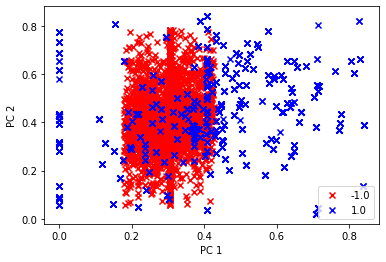

Imprimindo boxplot dos atributos.......................................


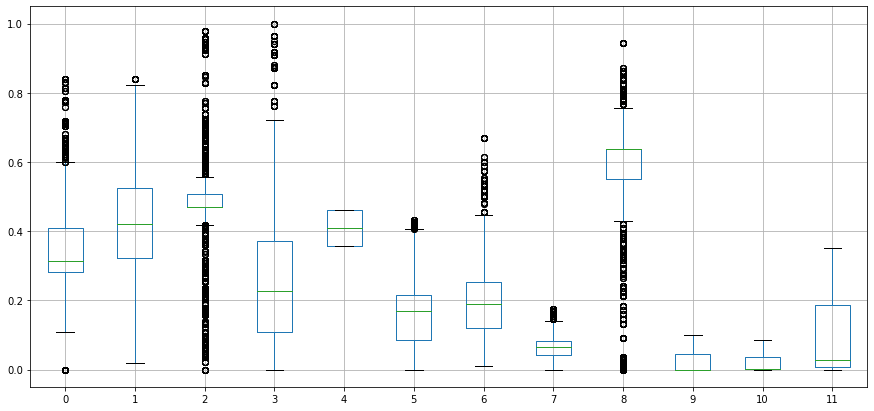

3397
0
3397

Dimensao de X_train:  (6794, 12)

Dimensao de X:  (8008, 15)

Dimensao de y_train:  (6794,)

Dimensao de y:  (8008,)

Classes do problema:  [-1.  1.]

Classes do problema:  [-1.  1.]


-1

In [9]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.semi_supervised import LabelSpreading
import utils
import numpy as np

print('Preenchendo arrays a partir dos datasets de entrada com dados cuja a classe é definida')
X = input_dataset.loc[(input_dataset['classe'] == -1) | (input_dataset['classe'] == 1)].drop('classe', axis=1).drop('Id', axis=1).values
y = input_dataset.loc[(input_dataset['classe'] == -1) | (input_dataset['classe'] == 1),'classe'].values
K = input_dataset.loc[test_dataset.iloc[:,:].values.T[0]].drop('classe', axis=1).drop('Id', axis=1).values
print('X',X.shape)
print('y',y.shape)
print('K',K.shape)

Xsemi = input_dataset.loc[(input_dataset['classe'] == 0)].drop('classe', axis=1).drop('Id', axis=1).values

print('Removendo atributos com baixa variância....................................')
variance_mask = VarianceThreshold().fit(X).get_support()
X = X[:,variance_mask]
K = K[:,variance_mask]
Xsemi = Xsemi[:,variance_mask]
print('Atributos removidos por baixa variância: %d' % np.sum(~variance_mask))

print('Separando a base em treino e teste')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

print('Removendo atributos com alta correlação....................................')
X_train, corr_mask = utils.remove_correlated(X_train, 0.95)
X_test = np.delete(X_test, corr_mask, axis=1)
Xsemi = np.delete(Xsemi, corr_mask, axis=1)
print('Atributos removido por alta correlação: %d' % len(corr_mask))
print('Removendo atributos com alta correlação....................................')
X, corr_mask = utils.remove_correlated(X, 0.95)
K = np.delete(K, corr_mask, axis=1)
print('Atributos removido por alta correlação: %d' % len(corr_mask))

print('Balanceando amostras das classes: Antes: -1=%d 1=%d' % (np.sum(y_train==-1), np.sum(y_train==1)))
X_train, y_train = utils.balance_classes_up(X_train, y_train)
X_test, y_test = utils.balance_classes_up(X_test, y_test)
X, y = utils.balance_classes_up(X, y)
print('Balanceando amostras das classes: Depois: -1=%d 1=%d' % (np.sum(y_train==-1), np.sum(y_train==1)))

print('Limpando datasets de entrada de dados')
X_test = utils.clean_dataset(X_test)
K = utils.clean_dataset(K)
Xsemi = utils.clean_dataset(Xsemi)

print('Normalizing scale between 0 and 1..................................')
X = MinMaxScaler().fit_transform(X)
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)
K = MinMaxScaler().fit_transform(K)
Xsemi = MinMaxScaler().fit_transform(Xsemi)

print('Extraindo os melhores atributos dentre os %d atributos de X_train.' % X_train.shape[1])
estimator = DecisionTreeClassifier(random_state=1)
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X_train, y_train)
X_train = X_train[:,selector.support_]
X_test = X_test[:,selector.support_]
Xsemi = Xsemi[:,selector.support_]
print('Número de atributos restantes após a operação: %d' % X_train.shape[1])

print('Extraindo os melhores atributos dentre os %d atributos de X.' % X.shape[1])
estimator = DecisionTreeClassifier(random_state=1)
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)
X = X[:,selector.support_]
K = K[:,selector.support_]
print('Número de atributos restantes após a operação: %d' % X.shape[1])

print('Adding semi supervising samples ......................................')
X_train = np.concatenate((X_train, Xsemi))
y_train = np.concatenate((y_train, np.full(Xsemi.shape[0], np.inf)))
y_train = np.where(y_train==-1, 0, y_train)
y_train = np.where(y_train==np.inf, -1, y_train)
label_prop_model = LabelSpreading()
y_train = label_prop_model.fit(X_train, y_train).predict(X_train)
y_train = np.where(y_train==0, -1, y_train)

print(X_train.shape)
print(y_train.shape)
#np.savetxt("Xtrain.csv", np.append(X_train, y_train[:,None], 1), delimiter=",")

for i in range(10):
    print('Balanceando amostras das classes: Antes: -1=%d 1=%d' % (np.sum(y_train==-1), np.sum(y_train==1)))
    X_train, y_train = utils.balance_classes_up(X_train, y_train)
    X_test, y_test = utils.balance_classes_up(X_test, y_test)
    X, y = utils.balance_classes_up(X, y)
    print('Balanceando amostras das classes: Depois: -1=%d 1=%d' % (np.sum(y_train==-1), np.sum(y_train==1)))


print('Imprimindo projeção em PCA.........................................')
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X_train)


#y_train[projected[:,0] < 0.4] = -1
colors = ['r', 'b']
markers = ['x', 'x']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train[y_train==l, 0], 
                X_train[y_train==l, 1], 
                c=c, label=l, marker=m)
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower right')
plt.show()

print('Imprimindo boxplot dos atributos.......................................')
df = pd.DataFrame(data=X_train)
df.boxplot(figsize=(15,7))
plt.show()

print(np.sum(y_train==1))
print(np.sum(y_train==0))
print(np.sum(y_train==-1))


print('\nDimensao de X_train: ', X_train.shape)
print('\nDimensao de X: ', X.shape)

print('\nDimensao de y_train: ', y_train.shape)
print('\nDimensao de y: ', y.shape)

print('\nClasses do problema: ', np.unique(y_train))
print('\nClasses do problema: ', np.unique(y))


duration = 0.5  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

time.sleep(0.5)
    
duration = 0.5  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais ensinados no curso e executando os métodos inteligentes

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf


xdf_o = pd.DataFrame(data=X_train)
Q1 = xdf_o.quantile(0.25)
Q3 = xdf_o.quantile(0.75)
IQR = Q3 - Q1
mask = (xdf_o < (Q1 - 1.5 * IQR)) | (xdf_o > (Q3 + 1.5 * IQR))
print('Outliers encontrados e removidos: %d' % np.count_nonzero(mask == True))
xdf_o[mask] = np.nan
xdf_o = xdf_o.fillna(xdf_o.median())
X_train = xdf_o.to_numpy()

xdf_o = pd.DataFrame(data=X)
Q1 = xdf_o.quantile(0.25)
Q3 = xdf_o.quantile(0.75)
IQR = Q3 - Q1
mask = (xdf_o < (Q1 - 1.5 * IQR)) | (xdf_o > (Q3 + 1.5 * IQR))
print('Outliers encontrados e removidos: %d' % np.count_nonzero(mask == True))
xdf_o[mask] = np.nan
xdf_o = xdf_o.fillna(xdf_o.median())
X = xdf_o.to_numpy()

'''
print('Imprimindo projeção em PCA.........................................')
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X_train)


#y_train[projected[:,0] < 0.4] = -1
colors = ['r', 'b']
markers = ['x', 'x']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train[y_train==l, 0], 
                X_train[y_train==l, 1], 
                c=c, label=l, marker=m)
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower right')
plt.show()

print('Imprimindo boxplot dos atributos.......................................')
df = pd.DataFrame(data=X_train)
df.boxplot(figsize=(15,7))
plt.show()
'''    
'''
y_train = np.where(y_train==-1,0,y_train)
y_test = np.where(y_test==-1,0,y_test)
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(9, input_shape=(9,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.fit(train_dataset, epochs=50)

print(model.evaluate(test_dataset))
'''

cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

model = LogisticRegression(random_state=1, max_iter=15000)
y_pred = model.fit(X_train, y_train).predict(X_train)
print("LR Train:",metrics.accuracy_score(y_train, y_pred))
y_pred = model.fit(X_train, y_train).predict(X_test)
print("LR Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_proba = model.fit(X_train, y_train).predict_proba(X_test)
print("LR AUC:",metrics.roc_auc_score(y_test, y_proba[:,1]))
#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#scores = cross_val_score(model, X_train, y_train, cv=cv)
#print('Cross Accuracy: %.3f (%.3f)------------------' % (np.mean(scores), np.std(scores)))
    
model = RandomForestClassifier(max_depth=2, random_state=1)
y_pred = model.fit(X_train, y_train).predict(X_train)
print("RR Train:",metrics.accuracy_score(y_train, y_pred))
y_pred = model.fit(X_train, y_train).predict(X_test)
print("RR Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_proba = model.fit(X_train, y_train).predict_proba(X_test)
print("RR AUC:",metrics.roc_auc_score(y_test, y_proba[:,1]))
#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Cross Accuracy: %.3f (%.3f)------------------' % (np.mean(scores), np.std(scores)))

model = MultinomialNB()
y_pred = model.fit(X_train, y_train).predict(X_train)
print("MNB Train:",metrics.accuracy_score(y_train, y_pred))
y_pred = model.fit(X_train, y_train).predict(X_test)
print("MNB Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_proba = model.fit(X_train, y_train).predict_proba(X_test)
print("MNB AUC:",metrics.roc_auc_score(y_test, y_proba[:,1]))
#print(classification_report(y_test, y_pred))
#plot_confusion_matrix(model, X_test, y_test)
#plt.show()
print(confusion_matrix(y_test, y_pred))
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Cross Accuracy: %.3f (%.3f)------------------' % (np.mean(scores), np.std(scores)))

model = svm.SVC(decision_function_shape='ovo', probability=True,random_state=1)
y_pred = model.fit(X_train, y_train).predict(X_train)
print("SVM Train:",metrics.accuracy_score(y_train, y_pred))
y_pred = model.fit(X_train, y_train).predict(X_test)
print("SVM Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_proba = model.fit(X_train, y_train).predict_proba(X_test)
print("SVM AUC:",metrics.roc_auc_score(y_test, y_proba[:,1]))
#print(classification_report(y_test, y_pred))
#plot_confusion_matrix(model, X_test, y_test)
#plt.show()
print(confusion_matrix(y_test, y_pred))
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Cross Accuracy: %.3f (%.3f)------------------' % (np.mean(scores), np.std(scores)))



if True:    
    model = KNeighborsClassifier()
    y_pred = model.fit(X_train, y_train).predict(X_train)
    print("KNN Train:",metrics.accuracy_score(y_train, y_pred))
    y_pred = model.fit(X_train, y_train).predict(X_test)
    print("KNN Accuracy:",metrics.accuracy_score(y_test, y_pred))
    y_proba = model.fit(X_train, y_train).predict_proba(X_test)
    print("SVM AUC:",metrics.roc_auc_score(y_test, y_proba[:,1]))
    #print(classification_report(y_test, y_pred))
    #plot_confusion_matrix(model, X_test, y_test)
    #plt.show()
    print(confusion_matrix(y_test, y_pred))
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Cross Accuracy: %.3f (%.3f)------------------' % (np.mean(scores), np.std(scores)))

    model = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(300,), random_state=1, max_iter=5000)
    y_pred = model.fit(X_train, y_train).predict(X_train)
    print("NN Train:",metrics.accuracy_score(y_train, y_pred))
    y_pred = model.fit(X_train, y_train).predict(X_test)
    print("NN Accuracy:",metrics.accuracy_score(y_test, y_pred))
    y_proba = model.fit(X_train, y_train).predict_proba(X_test)
    print("SVM AUC:",metrics.roc_auc_score(y_test, y_proba[:,1]))
    #print(classification_report(y_test, y_pred))
    #plot_confusion_matrix(model, X_test, y_test)
    #plt.show()
    print(confusion_matrix(y_test, y_pred))
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Cross Accuracy: %.3f (%.3f)------------------' % (np.mean(scores), np.std(scores)))
    
    print('Printing model to submission.csv')
    y_pred = model.fit(X, y).predict(K)
    y_pred_submission = model.fit(X, y).predict_proba(K)[:,1]
    result = np.zeros((K.shape[0],2))
    for i in range(K.shape[0]):
        result[i][0] = test_dataset.iloc[:,:].values.T[0][i]
        result[i][1] = y_pred_submission[i]
    resultdf = pd.DataFrame(data=result, columns=["Id", "Predicted"])
    resultdf['Id'] = resultdf['Id'].astype(int)
    resultdf['Predicted'] = resultdf['Predicted'].round(decimals=5)
    resultdf.to_csv('submission.csv', index=False, float_format='%.5f')

    
duration = 0.5  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

time.sleep(0.5)
    
duration = 0.5  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

time.sleep(0.5)
    
duration = 0.5  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))



Outliers encontrados e removidos: 3779
Outliers encontrados e removidos: 4284
LR Train: 1.0
LR Accuracy: 0.730817610062893
LR AUC: 0.834895771528025
[[468 327]
 [101 694]]
Cross Accuracy: 0.999 (0.001)------------------
RR Train: 1.0
RR Accuracy: 0.7276729559748427
RR AUC: 0.7233519243700803
[[645 150]
 [283 512]]


OSError: [Errno 12] Cannot allocate memory

---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos e comparados, através de tabelas e gráficos